# Introdução ao Processamento de Linguagem Natural usando Python

# Antes de começar!

### Dicas!

Para instalar novos pacotes:

 - pip install nome_do_pacote

OU 

 - conda install nome_do_pacote 


### Pacotes necessarios: 
    - conda install -c conda-forge wordcloud 
    - pip install nltk
    - pip install pandas
    - pip install spacy
    

## Atenção!

Os nomes das lojas foram ocultados para mantermos a segurança da loja.

A empresa foi substituído por códigos para representar cada uma individualmente.

Dentro do corpo da reclamação, o nome da loja foi substituído  por "LOJA"

Nomes e emails também foram removidos.

# Atenção!

Antes de começarmos é necessario baixar a lista de stopwords, sentence tokenization e o corpus do NLTK

In [24]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('machado')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!


True

# 1. Exemplo -  Corpus

In [25]:
from nltk.corpus import machado

# Verificando o conjunto de textos contido no Corpus Machado
print(machado.fileids())

# Cada arquivo corresponde a uma das obras de Machado de Assis. 

['contos/macn001.txt', 'contos/macn002.txt', 'contos/macn003.txt', 'contos/macn004.txt', 'contos/macn005.txt', 'contos/macn006.txt', 'contos/macn007.txt', 'contos/macn008.txt', 'contos/macn009.txt', 'contos/macn010.txt', 'contos/macn011.txt', 'contos/macn012.txt', 'contos/macn013.txt', 'contos/macn014.txt', 'contos/macn015.txt', 'contos/macn016.txt', 'contos/macn017.txt', 'contos/macn018.txt', 'contos/macn019.txt', 'contos/macn020.txt', 'contos/macn021.txt', 'contos/macn022.txt', 'contos/macn023.txt', 'contos/macn024.txt', 'contos/macn025.txt', 'contos/macn026.txt', 'contos/macn027.txt', 'contos/macn028.txt', 'contos/macn029.txt', 'contos/macn030.txt', 'contos/macn031.txt', 'contos/macn032.txt', 'contos/macn033.txt', 'contos/macn034.txt', 'contos/macn035.txt', 'contos/macn036.txt', 'contos/macn037.txt', 'contos/macn038.txt', 'contos/macn039.txt', 'contos/macn040.txt', 'contos/macn041.txt', 'contos/macn042.txt', 'contos/macn043.txt', 'contos/macn044.txt', 'contos/macn045.txt', 'contos/m

In [26]:
# Para acessar o texto como uma lista de 200 caracteres..
raw_machado_text = machado.raw('romance/marm05.txt') # explore outros arquivos
raw_machado_text[10000:10200]

', primou no\nEstado, e foi um dos amigos particulares do vice-rei Conde da Cunha.\n\nComo este apelido de Cubas lhe\ncheirasse excessivamente a tanoaria, alegava meu pai, bisneto de Damião, que o\ndito ape'

In [27]:
# Porem, a forma acima não é uma maneira muito útil de trabalhar com um texto. 
# Geralmente pensamos em um texto como uma sequência de palavras e pontuação, não em caracteres..
text1 = machado.words('romance/marm05.txt')
text1

['Romance', ',', 'Memórias', 'Póstumas', 'de', 'Brás', ...]

In [28]:
# Checando o tamanho do romance marm05.txt
print('Quantidade de palavras {}'.format(len(text1)))
# Checando o tamanho de palavras unicas do texto
print('Quantidade de palavras unicas {}'.format(len(set(text1))))

Quantidade de palavras 77098
Quantidade de palavras unicas 10848


In [0]:
# Sua vez: O que mais podemos fazer?
# Liste aqui suas ideia!

http://www.nltk.org/howto/portuguese_en.html

# Dados Reclame Aqui

## 1. Importando os Dados

In [0]:
## Para executar na sua maquina local, Descomente essa celula

# Importando Pandas
# import pandas as pd

# Vamos agora importar os dados que vamos trabalhar!
# reclamacoes = pd.read_csv('reclamacoes.csv', sep=';')

# print(reclamacoes.shape)

# reclamacoes.head()

In [31]:
## Para executar no Google Colab

from google.colab import files

uploaded = files.upload()

import io
data = io.BytesIO(uploaded['reclamacoes.csv'])    

import pandas as pd   
reclamacoes = pd.read_csv(data, sep=';')

reclamacoes.head()

KeyError: ignored

In [0]:
# Verificando se tem dados faltantes
reclamacoes.isna().sum()

## 2.Pré-Processamento

### 2.1 Quebrando a coluna data_reclamacao em dia e hora

In [0]:
# Vamos separar as informações

print('Como era antes:')
print(reclamacoes['data_reclamacao'][:3])

# Separando...
reclamacoes['data'] = reclamacoes['data_reclamacao'].str.split('às',expand=True)[0]

print('\n')
print('Como ficou agora:')
print(reclamacoes['data'][:3])

In [0]:
# Sua vez: Faça a mesma coisa para a informação hora
reclamacoes['hora'] = reclamacoes['data_reclamacao'].str.split('às',expand=True)[1]

# Você consegue identificar algo que está faltando ao utilizar essa nossa técnica?
# Dica: Utilize reclamacoes.data[0]
reclamacoes.data[0]

In [0]:
# Como resolver o problema acima?
# Sua solução:
reclamacoes['data'] = reclamacoes['data'].str.strip()
reclamacoes['hora'] = reclamacoes['hora'].str.strip()

# Verifique se a sua solução funcionou:
reclamacoes.data[0]

### 2.2 Quebrando a coluna local em Cidade e Estado

In [0]:
# Sua vez: Faça a mesma coisa para que você fez acima para a variavel local e estado
# não se esqueça do problema que resolvemos acima!
reclamacoes['cidade'] = reclamacoes['local'].str.split('-',expand=True)[0].str.strip()
reclamacoes['estado'] = reclamacoes['local'].str.split('-',expand=True)[1].str.strip()

In [0]:
# Visualizando as alterações que fizemos
reclamacoes[['data_reclamacao', 'data', 'hora', 'local', 'cidade', 'estado']].head()

### 2.3 Alterar tipo de colunas

In [0]:
# Verificando o tipo de dados 
reclamacoes.info()

In [0]:
# Colunas que são categoricas
reclamacoes['teve_resposta'] = reclamacoes['teve_resposta'].astype('category')

# Colunas que são datetime
reclamacoes['data'] = pd.to_datetime(reclamacoes['data'])

reclamacoes.info()

### 2.4 LowerCase

In [0]:
print('Antes:')
print(reclamacoes['corpo_reclamacao'].head())

In [0]:
# Aplicando Lower Case
reclamacoes['corpo_reclamacao_lower'] = [str(token).lower() for token in reclamacoes['corpo_reclamacao']]

print('Depois:')
reclamacoes.corpo_reclamacao_lower.head()

### 2.5 Tokenização

In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize

# Vamos dividir um exemplo texto em tokens/palavras:
tokens = word_tokenize('A história do NLP começou na década de 1950, com Alan Turing'.lower())

print(tokens)

print('\nQuantidade de Tokens: {}'.format(len(tokens)))

In [0]:
# Agora vamos dividir um exemplo texto em sentenças:
sentencas = sent_tokenize('O Processamento! de Linguagem Natural (PLN) é a subárea da Inteligência Artificial (IA) que estuda a capacidade e as limitações de uma máquina em entender a linguagem dos seres humanos. O objetivo do PLN é fornecer aos computadores a capacidade de entender e compor textos. “Entender” um texto significa reconhecer o contexto, fazer análise sintática, semântica, léxica e morfológica, criar resumos, extrair informação, interpretar os sentidos, analisar sentimentos e até aprender conceitos com os textos processados.') 

# Visualizando cada sentença
print(sentencas[0])
print()
print(sentencas[1])
print()
print(sentencas[2])

print('\nQuantidade de Sentenças: {}'.format(len(sentencas)))

In [0]:
# Sua vez: Separe os nossos textos em tokens e coloque em uma nova coluna chamada corpo_reclamacao_tokens
reclamacoes['corpo_reclamacao_tokens'] = [word_tokenize(token) for token in reclamacoes['corpo_reclamacao_lower']]

In [0]:
# Como ficou nosso dataset até agora
reclamacoes.head()

### 2.6 Remoção das StopWords

In [0]:
from nltk.corpus import stopwords
from string import punctuation
import re # Regex

#  Regex para encontrar pontuações dentro do texto
other_punctuation_reg = r'(\.{2,}|-+|—+|\|+)'

other_punctuation_finds = []

# Percorre a lista de reclamções e identica as pontuações
for text in reclamacoes.corpo_reclamacao_lower:
    # encontra as pontuações
    p = re.search(other_punctuation_reg, text)
    if p:
        other_punctuation_finds.append(p.group())

# Gera lista com stopwords em Português  
portuguese_stopswords = set(stopwords.words('portuguese') + list(punctuation) + other_punctuation_finds)

# Adicionando outras palavras na nossa lista de StopWords
portuguese_stopswords.add('é')

portuguese_stopswords

O comando stopwords.words("portuguese") lista todas as stopwords em português; 

OU

Para visualizar a lista de StopWords:

C:\Users\SEU_USUARIO\AppData\Roaming\nltk_data\corpora\stopwords

In [0]:
# Verificando como era antes
print('Antes de remover as StopWords:')
reclamacoes.corpo_reclamacao_lower[0]

In [0]:
# Exemplo - Removendo StopWords da primeira reclamação
palavras_sem_stopwords = [token for token in reclamacoes['corpo_reclamacao_tokens'][0] if token not in portuguese_stopswords]
palavras_sem_stopwords

In [0]:
# Função que remove as stopwords
def remove_stopwords(text, portuguese_stopswords):
    print('Tamanho do texto original {}'.format(len(word_tokenize(text))))
    # Remove as stopwords
    msgTokens_sem_stopwords = [token.lower() for token in word_tokenize(text) if token not in portuguese_stopswords]
    print('Tamanho do texto sem stopwords {}'.format(len(msgTokens_sem_stopwords)))
    print('Foram removidas {} stopwords'.format(len(word_tokenize(text))-len(msgTokens_sem_stopwords)))
    aux_msgTokens = " ".join(str(msg) for msg in msgTokens_sem_stopwords)
    return aux_msgTokens

In [34]:
# Removendo StopWords de todas as reclamações
   
# Percorre a lista de reclamações e cria uma coluna nova com o texto sem stopWords
for idx,text in enumerate(reclamacoes.corpo_reclamacao_lower):
    print('Removendo StopWords do index {}'.format(idx))
    reclamacoes.at[idx, 'corpo_reclamacao_semStopWords'] = remove_stopwords(text, portuguese_stopswords)
    print('---'*20)

Removendo StopWords do index 0
Tamanho do texto original 467
Tamanho do texto sem stopwords 222
Foram removidas 245 stopwords
------------------------------------------------------------
Removendo StopWords do index 1
Tamanho do texto original 159
Tamanho do texto sem stopwords 78
Foram removidas 81 stopwords
------------------------------------------------------------
Removendo StopWords do index 2
Tamanho do texto original 160
Tamanho do texto sem stopwords 84
Foram removidas 76 stopwords
------------------------------------------------------------
Removendo StopWords do index 3
Tamanho do texto original 288
Tamanho do texto sem stopwords 163
Foram removidas 125 stopwords
------------------------------------------------------------
Removendo StopWords do index 4
Tamanho do texto original 174
Tamanho do texto sem stopwords 85
Foram removidas 89 stopwords
------------------------------------------------------------
Removendo StopWords do index 5
Tamanho do texto original 62
Tamanho do 

In [35]:
# Removendo StopWords de todas as Tags

# Percorre a lista de reclamações e cria uma coluna nova com o tags sem stop Words
reclamacoes.tags = reclamacoes.tags.astype(str)
for idx,text in enumerate(reclamacoes.tags):
    print('Removendo StopWords do index {}'.format(idx))
    reclamacoes.at[idx, 'Tags_semStopWords'] = remove_stopwords(text, portuguese_stopswords)
    print('---'*20)


Removendo StopWords do index 0
Tamanho do texto original 2
Tamanho do texto sem stopwords 2
Foram removidas 0 stopwords
------------------------------------------------------------
Removendo StopWords do index 1
Tamanho do texto original 10
Tamanho do texto sem stopwords 6
Foram removidas 4 stopwords
------------------------------------------------------------
Removendo StopWords do index 2
Tamanho do texto original 9
Tamanho do texto sem stopwords 6
Foram removidas 3 stopwords
------------------------------------------------------------
Removendo StopWords do index 3
Tamanho do texto original 3
Tamanho do texto sem stopwords 2
Foram removidas 1 stopwords
------------------------------------------------------------
Removendo StopWords do index 4
Tamanho do texto original 8
Tamanho do texto sem stopwords 6
Foram removidas 2 stopwords
------------------------------------------------------------
Removendo StopWords do index 5
Tamanho do texto original 6
Tamanho do texto sem stopwords 5
Fo

In [36]:
reclamacoes.head()

,empresa,data_reclamacao,local,titulo_reclamacao,corpo_reclamacao,tags,teve_resposta,cidade,estado,corpo_reclamacao_lower,corpo_reclamacao_tokens,corpo_reclamacao_semStopWords,Tags_semStopWords
0,Loja A,23/03/19 às 18h33,Guarulhos - SP,Mau Atendimento,Nunca mais compro nessa loja pelo fato de que ...,Calçados Esportivos,0,Guarulhos,SP,nunca mais compro nessa loja pelo fato de que ...,"[nunca, mais, compro, nessa, loja, pelo, fato,...",nunca compro nessa loja fato pior atendimento ...,calçados esportivos
1,Loja A,23/03/19 às 18h20,Taubaté - SP,Produtos misturado na gondula e divergência na...,"Eu a LOJA comprar uma luva de musculação, na q...","Divergência de valores, Acessórios para Muscul...",0,Taubaté,SP,"eu a loja comprar uma luva de musculação, na q...","[eu, a, loja, comprar, uma, luva, de, musculaç...",loja comprar luva musculação gondula descrito ...,divergência valores acessórios musculação arti...
2,Loja A,23/03/19 às 11h07,Franco da Rocha - SP,Informaçao errada do vendedor.,Estive na LOJA da Marginal Tiete no dia 15 de ...,"Produto errado, Raquetes e Tacos, Artigos Espo...",0,Franco da Rocha,SP,estive na loja da marginal tiete no dia 15 de ...,"[estive, na, loja, da, marginal, tiete, no, di...",loja marginal tiete dia 15 março 2019 procura ...,produto errado raquetes tacos artigos esportivos
3,Loja A,23/03/19 às 10h57,Teresina - PI,Paguei por um produto fora do estoque,Comprei 3 produtos no dia 13.03 e recebi email...,Acessórios de Vestuário,1,Teresina,PI,comprei 3 produtos no dia 13.03 e recebi email...,"[comprei, 3, produtos, no, dia, 13.03, e, rece...",comprei 3 produtos dia 13.03 recebi email conf...,acessórios vestuário
4,Loja A,22/03/19 às 19h49,São Gonçalo do Pará - MG,entregaram meu pedido a outra pessoa falando q...,comprei um tenis esportivo e ao receber o avis...,Problemas na finalização da compra Tênis Calça...,0,São Gonçalo do Pará,MG,comprei um tenis esportivo e ao receber o avis...,"[comprei, um, tenis, esportivo, e, ao, receber...",comprei tenis esportivo receber aviso pedido c...,problemas finalização compra tênis calçados es...


### 2.7 Normalização das palavras - Stemming e Lemmatization 

Na língua portuguesa temos diferentes palavras flexionadas em gênero, número ou grau, além de alguns tempos verbais distintos.

*Reclamar – Reclamação*

*Problema – Problemão*

A normalização de palavras pode ser entendida como a simplificação ou a radicalização de palavras.

E existem duas técnicas mais conhecidas:

*Stemming* - O processo de stemming consiste em reduzir a palavra à sua raiz, não levando em consideração a classe gramatical da palavra.

*Lemmatization* - Consiste em aplicar técnicas para deflexionar as palavras (retira a conjugação verbal, caso seja um verbo, e altera os substantivos e os adjetivos para o singular masculino, de maneira a reduzir a palavra até sua forma de dicionário).

Ex.:

Menino: menino, menina, meninão

Ficar: ficar, ficou, fique



In [37]:
nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()

palavras = ['reclamação', 'reclamei', 'reclamando']

for w in palavras:
    print(stemmer.stem(w))
 

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
reclam
reclam
reclam


### Lemmatization

In [38]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
 
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Exemplo de lematização, porém não existe uma biblioteca em português apenas em inglês no momento.

In [39]:
palavras = ['jumps', 'ladies', 'oranges']

for w in palavras:
    print(lemmatizer.lemmatize(w))
    

jump
lady
orange


## 3.Análise dos dados

### 3.1 Analise Empresas

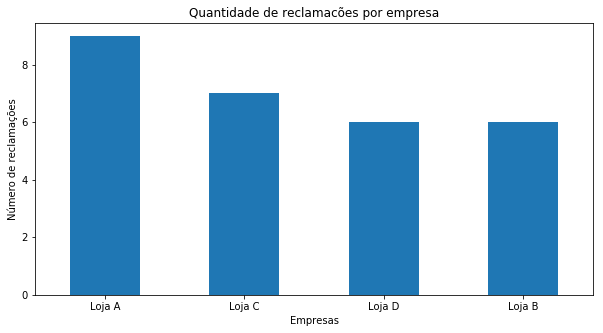

In [40]:
# Gráficos
import matplotlib.pyplot as plt

%matplotlib inline
# Quantidade de reclamcoes por empresa
empresa = reclamacoes.groupby("empresa")

plt.figure(figsize=(10,5))
empresa.size().sort_values(ascending=False).plot.bar()
plt.title("Quantidade de reclamacões por empresa")
plt.xticks(rotation=0)
plt.xlabel("Empresas")
plt.ylabel("Número de reclamações")
plt.show()

### 3.2 Cidade e Estado

#### Cidades

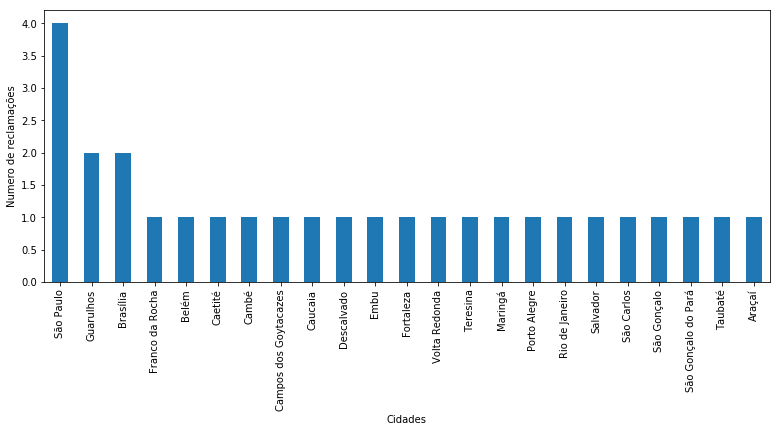

In [41]:
# Vendo quando locais recebem vem as reclamações
cidades = reclamacoes.groupby("cidade")

plt.figure(figsize=(13,5))
cidades.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Cidades")
plt.ylabel("Numero de reclamações")
plt.show()

#### Estados

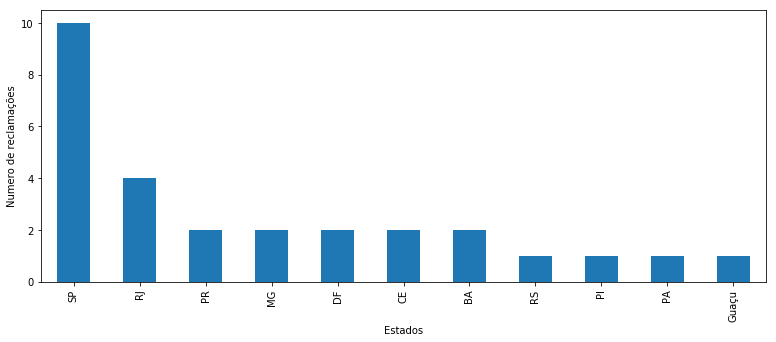

In [42]:
# Vendo quando locais recebem vem as reclamações
estados = reclamacoes.groupby("estado")

plt.figure(figsize=(13,5))
estados.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Estados")
plt.ylabel("Numero de reclamações")
plt.show()

### 3.3 Frequencia de palavras de todas as reclamações 

In [0]:
# NLTK
from nltk.probability import FreqDist

#função para ver as palavras mais frequente de todas as reclamações 

def freq_Words(text, number,titulo):
    words = word_tokenize(text)
    fdist = FreqDist(word for word in words)
    XY = fdist.items()
    XY = sorted(XY, key=lambda pair: pair[1], reverse=True)
    limit = number
    X = [x for (x,y) in XY[:limit]]
    Y = [y for (x,y) in XY[:limit]]
    nX = range(len(X))
    plt.figure(figsize=(13,5))
    plt.title("Tokens mais frequentes das {}".format(titulo))
    plt.plot(nX, Y, label='contagens dos tokens', color = "red")
    plt.xticks(nX, X, rotation='vertical')
    plt.xticks(rotation='60')
    plt.xlabel('Tokens')
    plt.ylabel('Contagens')
    plt.grid()
    plt.legend(loc='upper right', fontsize='small')
    #plt.tight_layout()
    plt.show()
    return fdist

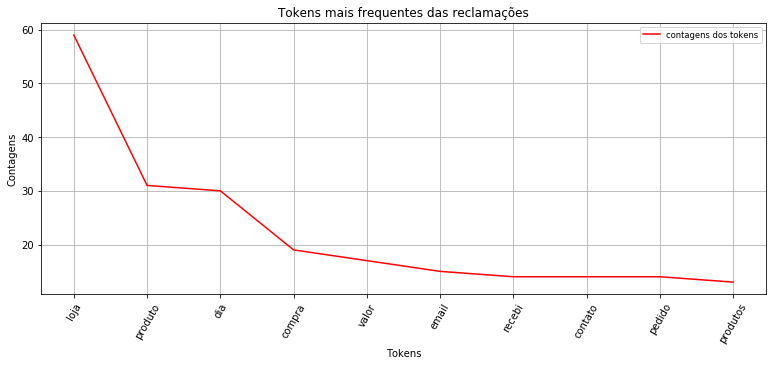

In [44]:
#juntando todas as mensagens em um unico texto
lista_reclamacao = ' '.join(reclamacoes.corpo_reclamacao_semStopWords.tolist())
frequencia = freq_Words(lista_reclamacao,10,"reclamações")

### 3.4 Frequencia de palavras de todas as tags 

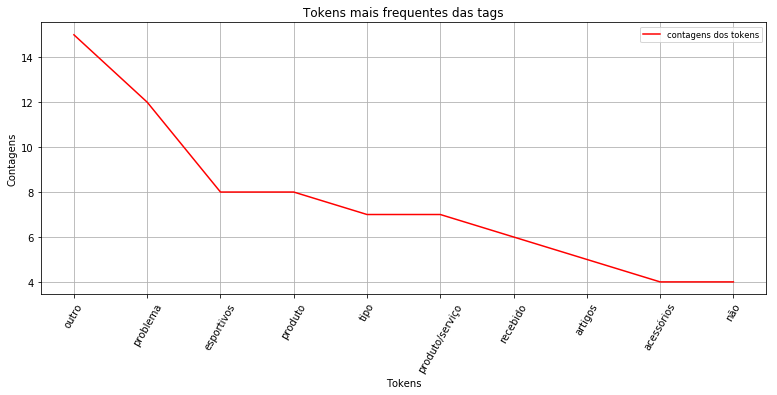

In [45]:
lista_tags = ' '.join(reclamacoes.Tags_semStopWords.tolist())
frequencia = freq_Words(lista_tags,10,"tags")

### 3.5 Frequencia de Respostas 

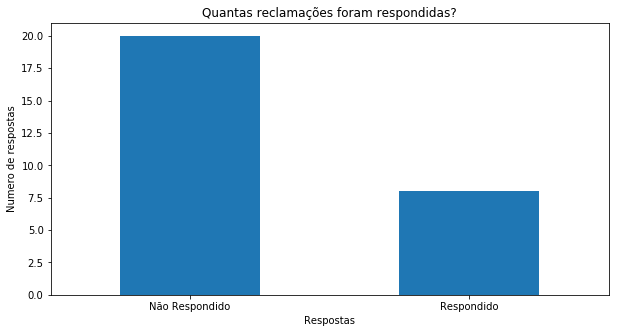

In [46]:
reclamacoes.teve_resposta = reclamacoes.teve_resposta.replace(0,"Não Respondido")
reclamacoes.teve_resposta = reclamacoes.teve_resposta.replace(1,"Respondido")      

respostas = reclamacoes.groupby("teve_resposta")
plt.figure(figsize=(10,5))
respostas.size().sort_values(ascending=False).plot.bar()
plt.title("Quantas reclamações foram respondidas?")
plt.xticks(rotation=0)
plt.xlabel("Respostas")
plt.ylabel("Numero de respostas")
plt.show()

## 4. Nuvem de palavras 

In [47]:
#Juntando todos os textos 

# Textos com StopWords
todas_reclamacoes = " ".join(review for review in reclamacoes.corpo_reclamacao_lower)

# Texto sem StopWords
todas_reclamacoes_semStopWords = " ".join(review for review in reclamacoes.corpo_reclamacao_semStopWords)

print ("Temos {} palavras juntando todas as reclamações.".format(len(todas_reclamacoes_semStopWords)))

print ("Temos {} palavras juntando todas as reclamações.".format(len(todas_reclamacoes)))

Temos 14354 palavras juntando todas as reclamações.
Temos 20348 palavras juntando todas as reclamações.


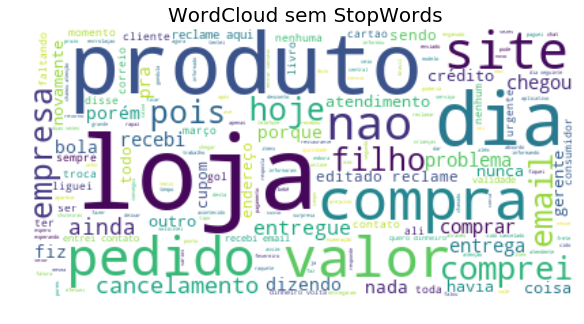

In [48]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image

# World Cloud
# Exemplo: World cloud de todas reclamações sem stopwords

# Gerando a wordcloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white").generate(todas_reclamacoes_semStopWords)

# Mostrando nuvem de palavras com o matplotlib 
plt.title('WordCloud sem StopWords', fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

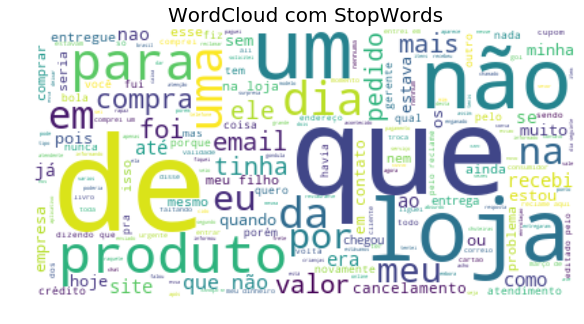

In [49]:
# World Cloud
# Exemplo: World cloud de todos os textos (com stopwords)

# Gerando a wordcloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white").generate(todas_reclamacoes)

#Mostrando nuvem de palavras com o matplotlib 
plt.title('WordCloud com StopWords', fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Reparem na diferença na visualização. 

Na segunda, o resultado é muito menos util para um tomador de decisão que o primeiro.

Por exemplo, "problema", "pedido", "gerente", podem ser palavras a levantar um alerta dentor da empresa.

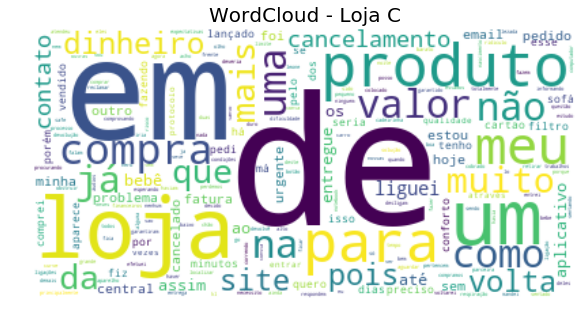

In [0]:
# Exercicios: World cloud de uma unica empresa
todas_reclamacoes_empresa = " ".join(review for review in reclamacoes[reclamacoes.empresa == "Loja C"].corpo_reclamacao_lower)
     
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white").generate(todas_reclamacoes_empresa)

#Mostrando nuvem de palavras com o matplotlib 
plt.title('WordCloud - Loja C', fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 4.1 Nuvem de palavras com Imagem

Saving pyladies.jpg to pyladies (2).jpg


(-0.5, 799.5, 799.5, -0.5)

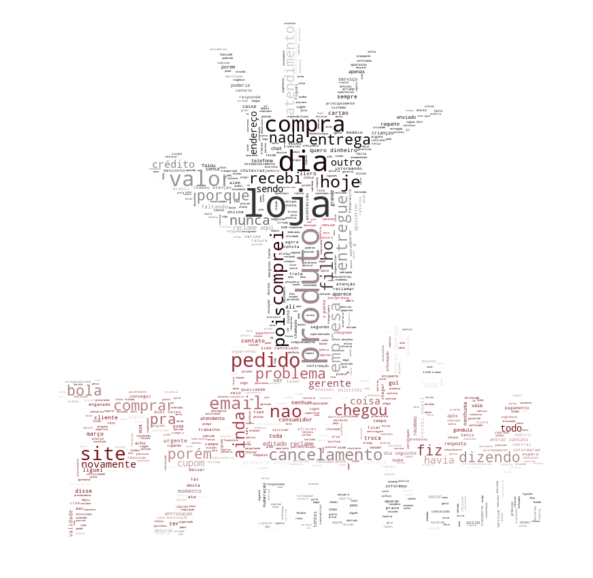

In [52]:
# Selecionar a imagem que será utilizada como template
# OBS: A imagem precisa estar na mesma pasta que o notebook!

# Para executar na sua maquina
#py_mask = np.array(Image.open("pyladies.jpg")) 

# Para executar no Google Colab
uploaded = files.upload()
py_mask = np.array(Image.open(io.BytesIO(uploaded['pyladies.jpg'])))

# Cria a WordCloud passando a imagem selecionada acima como mascara
wc = WordCloud(background_color="white", max_words=10000, mask=py_mask)

wc.generate(todas_reclamacoes_semStopWords)

# Salva a imagem na sua maquina :)
wc.to_file("py.png")


# plt.title('WordCloud - PyLadies', fontsize=20)
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.show()
plt.figure(figsize=[20,10])

image_colors = ImageColorGenerator(py_mask)
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear' )
plt.axis("off")


# Um pouco de Deep Learning!

Vamos agora entrar no mundo do Deep Learning!

Par isso vamos utilizar o Spacy, uma poderosa bilioteca de Processamento de Linguagem Natural e é focada em "entender" grandes quantidades de texto.

Para instalar descomente a celula abaixo:

<b>ATENÇÃO:</b> Para instalar o Spacy na sua maquina pessoal é necessario ter o Microsoft Visual C++ 14.0 (visual studio) instalado na maquina. No Colab ele já vem pré-instalado :)

In [0]:
# Se já não tiver instalado o spacy...

!pip install spacy
# !python -m spacy download en
!python -m spacy download pt
!python -m spacy download pt_core_news_sm

     |████████████████████████████████| 38.7MB 1.2MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-apsu3uh1/wheels/0b/f1/54/a8f759b41cf39d2a33d6da84cd90b8e2fefea549963396bbd2
Successfully built pt-core-news-sm

    Linking successful
    /usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/pt

    You can now load the model via spacy.load('pt')


    Linking successful
    /usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/pt_core_news_sm

    You can now load the model via spacy.load('pt_core_news_sm')



## 1. Primeiros passos com o Spacy

In [0]:
# Vamos usar o modelo pré-pronto que acabamos de baixar
import spacy

nlp = spacy.load('pt_core_news_sm') # Importando o modelo pré treinado de Deep Learning do Spacy em Português!

# Passando uma frase para o spacy
doc = nlp(u'Eai! Já ta sabendo tudo sobre NLP? A Camila conhece também, vou pedir pra ela me dar umas aulas')
# Obs: Repare no unicode na string...você deve usa-lo para que funcione corretamente.

# Tambem podemos Tokenizar o texto pelo Sapcy hehe
for token in doc:
    print(token.text)

Eai
!
Já
ta
sabendo
tudo
sobre
NLP
?
A
Camila
conhece
também
,
vou
pedir
pra
ela
me
dar
umas
aulas


## 2. Identificação de Entidades

A identificação de Entidade (em inglês Named Entity Recognition - NER) é a identificação de objetos/itens/coisas do mundo real, por exemplo, uma pessoa, um produto, um pais ou estado.

Com o Spacy é possivel se treinar seu proprio algoritmo de NER.

In [0]:
# Entidades

doc = nlp(u"Apesar da Maria morar em São Paulo, ela me disse que seu sonho era morar em Nova York")

for ent in doc.ents:
    print('Texto: {}'.format(ent.text))
    print('Inicio: {}'.format(ent.start_char))
    print('Fim: {}'.format(ent.end_char))
    print('Entidade: {}'.format(ent.label_))
    print('----'*5)

Texto: Maria
Inicio: 10
Fim: 15
Entidade: PER
--------------------
Texto: São Paulo
Inicio: 25
Fim: 34
Entidade: LOC
--------------------
Texto: Nova York
Inicio: 76
Fim: 85
Entidade: LOC
--------------------


Lista com os tipos de Entidade suportados/Identificados pelo Spacy: https://spacy.io/api/annotation#named-entities

In [0]:
# Visualizando de uma forma mais bonita!

from spacy import displacy
from IPython.core.display import display, HTML

html = displacy.render(doc, style="ent")
display(HTML(html))

In [0]:
# Sua vez!

# Exercicios: Aplique NER nas reclamações de uma empresa que você queira, quais entidades foram as mais retornadas?
reclamacoes_empresa_A = ' '.join(reclamacoes[reclamacoes.empresa == 'Loja A']['corpo_reclamacao'])
reclamacoes_empresa_A_spacy = nlp(reclamacoes_empresa_A)

html = displacy.render(reclamacoes_empresa_A_spacy, style="ent")
display(HTML(html))

## 3. Part-of-speech tagging - POS Tagging

### Análise de classes gramaticais 

Depois de tokenizar o texto é possivel identificar a classe gramatical de cada palavra/token (por exemplo, substantivo ou verbo)

Essa tecnica é bastante usada na geração automatica de legendas ou até mesmo na tradução automatica, pois com ela podemos entender o contexto da frase e inferir qual a proxima palavra é mais propensa a ser a correta

In [0]:
doc = nlp(u'Apesar da Maria morar em São Paulo, ela me disse que seu sonho era morar em Nova York')

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apesar Apesar ADV ADV|@ADVL> advmod Xxxxx True False
da da ADP PRP|@A< mark xx True True
Maria Maria PROPN PROPN nsubj Xxxxx True False
morar morar VERB <mv>|V|INF|3S|@ICL-P< advcl xxxx True False
em em ADP PRP|@<ADVL case xx True True
São São PROPN PROPN obl Xxx True False
Paulo Paulo PROPN PROPN flat:name Xxxxx True False
, , PUNCT PU|@PU punct , False False
ela ele PRON PERS|F|3S|NOM|@SUBJ> nsubj xxx True True
me me PRON <refl>|PERS|M/F|1S|ACC|@ACC> iobj xx True True
disse dizer VERB <mv>|V|PS|3S|IND|@FS-STA ROOT xxxx True False
que que SCONJ KS|@SUB mark xxx True True
seu seu DET <poss>|DET|M|S|@>N det xxx True True
sonho sonhar NOUN <np-def>|N|M|S|@SUBJ> nsubj xxxx True False
era ser VERB <cjt>|<mv>|V|IMPF|3S|IND|@FS-STA cop xxx True True
morar morar VERB <mv>|V|INF|@ICL-<SC ccomp xxxx True False
em em ADP PRP|@<ADVL case xx True True
Nova Nova PROPN PROPN obl Xxxx True False
York York PROPN PROPN flat:name Xxxx True False


In [0]:
html = displacy.render(doc, style="dep")
display(HTML(html))

# Fim :)